## Blob detection notebook

This notebook shows how to do **blob detection** in a 3D volume using the `qim3d` library. 

Blob detection is done by using the `qim3d.processing.blob_detection` method, which detects blobs by using the Difference of Gaussian (DoG) blob detection method, and returns two arrays:
- `blobs`: The blobs found in the volume stored as `(p, r, c, radius)`
- `binary_volume`: A binary mask of the volume with the blobs marked as `True`

### Blob detection in cement volume

First we apply a gaussian filter to the volume to remove some noise. This is done using the filters module, whereafter the result is visualized with the `slices_grid` method.

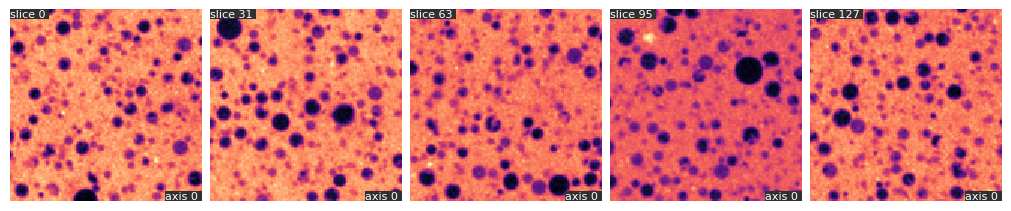

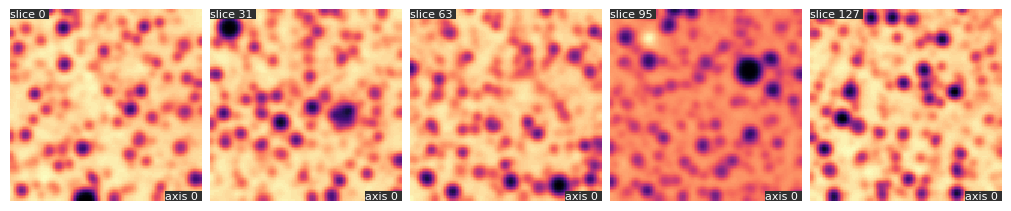

In [1]:
import qim3d

# Import 3D volume of cement
vol = qim3d.examples.cement_128x128x128

# Visualize slices of the original cement volume
fig1 = qim3d.viz.slices_grid(vol, num_slices=5, display_figure=True)

# Apply Gaussian filter to the cement volume
vol_filtered = qim3d.filters.gaussian(vol, sigma = 2)

# Visualize slices of the filtered cement volume
fig2 = qim3d.viz.slices_grid(vol_filtered, num_slices=5, display_figure=True)

Then the blobs are detected using the `blobs` method from the `detection` module.

In [2]:
# Detect blobs, and get binary mask
blobs, mask = qim3d.detection.blobs(
    vol_filtered,
    min_sigma=1,
    max_sigma=8,
    threshold=0.001,
    overlap=0.1,
    background="bright"
    )

# Number of blobs found
print(f'Number of blobs found in the volume: {len(blobs)} blobs')

Bright background selected, volume will be inverted.


Number of blobs found in the volume: 1813 blobs


We can then use the `circles` method to visualize the mask on top of slices of the original volume:

In [3]:
# Visualize blobs on slices of cement volume
qim3d.viz.circles(blobs, vol, alpha = 0.8, color='red')

interactive(children=(IntSlider(value=64, description='Slice', max=127), Output()), layout=Layout(align_items=…

Lastly we can use the `slicer` method to explore the slices of the mask created by the blob detector.

In [4]:
# Visualize binary mask
qim3d.viz.slicer(mask)

interactive(children=(IntSlider(value=64, description='Slice', max=127), Output()), layout=Layout(align_items=…